In [20]:
# The standard start of our notebooks
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

#  Clustering

## Data

In [21]:
# Load the data, which is included in sklearn.
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target).replace(to_replace=dict(enumerate(iris.target_names)))

In [22]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
dtype: object

## KMeans

Use KMeans to segment the iris data into two clusters

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)

Plot each of the 2D projections to see if the clustering "makes sense"

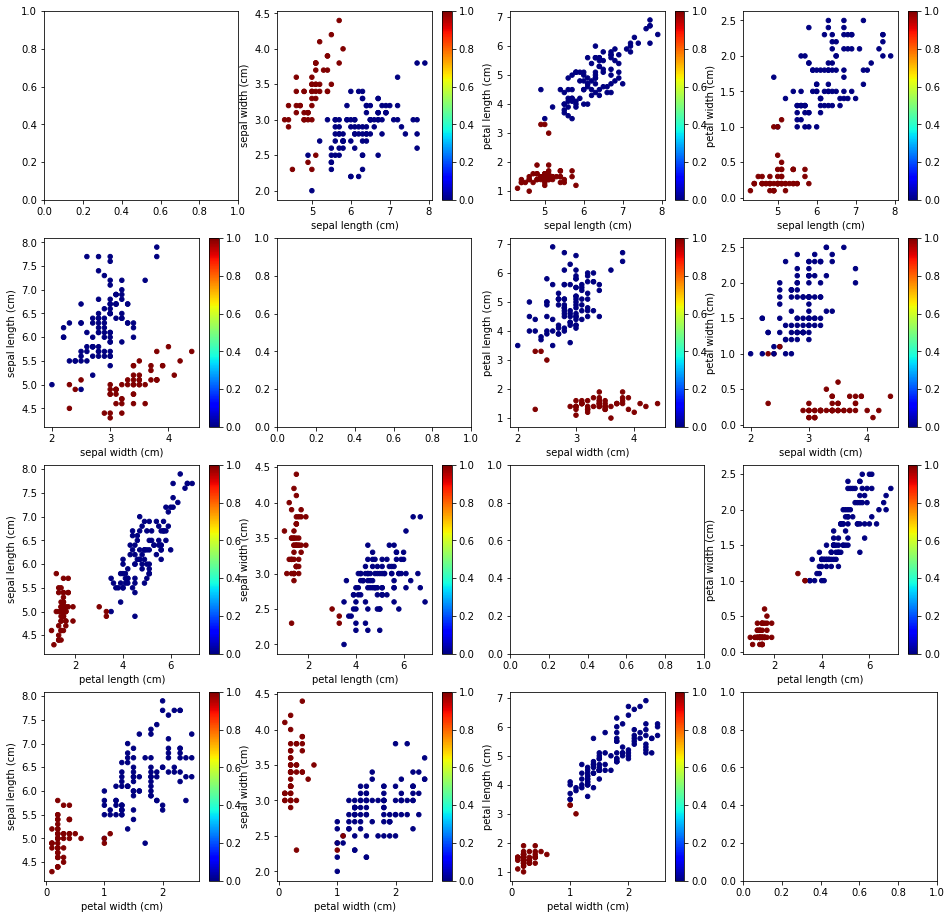

In [40]:
import matplotlib.cm as cm

fig, axes = plt.subplots(nrows=X.shape[1], ncols=X.shape[1], sharex=False, sharey=False, figsize = (16, 16))

cmap = cm.jet
for i, f1 in enumerate(X.columns):
    for j, f2 in enumerate(X.columns):
       if not f1 == f2:
        X.plot(kind='scatter', x=f1, y=f2, c=labels, cmap=cmap, ax=axes[i, j])
        
            
plt.show()

Compare to the actual labels

In [26]:
pd.crosstab(y, labels)

col_0,0,1,2,3
row_0,,,,
setosa,0,50,0,0
versicolor,27,0,23,0
virginica,1,0,17,32


Repeat the above for three or more clusters

## Pick number of clusters using scree plot

We would like to have a more data-driven approach to choosing the right number of clusters. Especially when we do not have any true labels.

### Exercise: 
(a) Plot k vs RSS for k between 1 and 10

(b) See how easily you can add a StandardScaler() step to kmeans. (That is, normalize the columns)

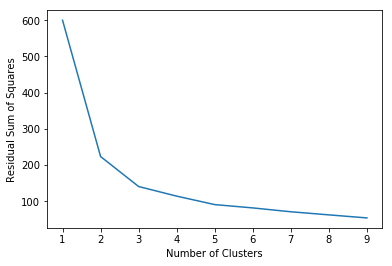

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clusts = range(1, 10)

def kmean_rss_score(nclust):
    km = KMeans(nclust)
#     km = Pipeline([('scale', StandardScaler()), ('cluster', KMeans(nclust))])
    km.fit(X)
    rss = -km.score(X)
    return rss

rss = [kmean_rss_score(i) for i in clusts]
plt.plot(clusts, rss)
plt.xlabel('Number of Clusters')
plt.ylabel('Residual Sum of Squares')


## Silhouette Scores

Silhouette scores are a slightly better measure of cluster 'goodness' since they take into effect the density of each cluster as well as the distance _between_ clusters.

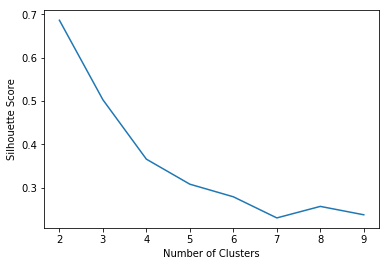

In [28]:
from silhouette import silhouette_plot
from sklearn.metrics import silhouette_samples, silhouette_score

clusts = range(2, 10)

def kmean_silhouette_score(nclust):
    km = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('kmeans', KMeans(nclust))
    ])
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    return score


scores = [kmean_silhouette_score(i) for i in clusts]
plt.plot(clusts, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

In [29]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

For n_clusters = 2 The average silhouette_score is : 0.68639305432


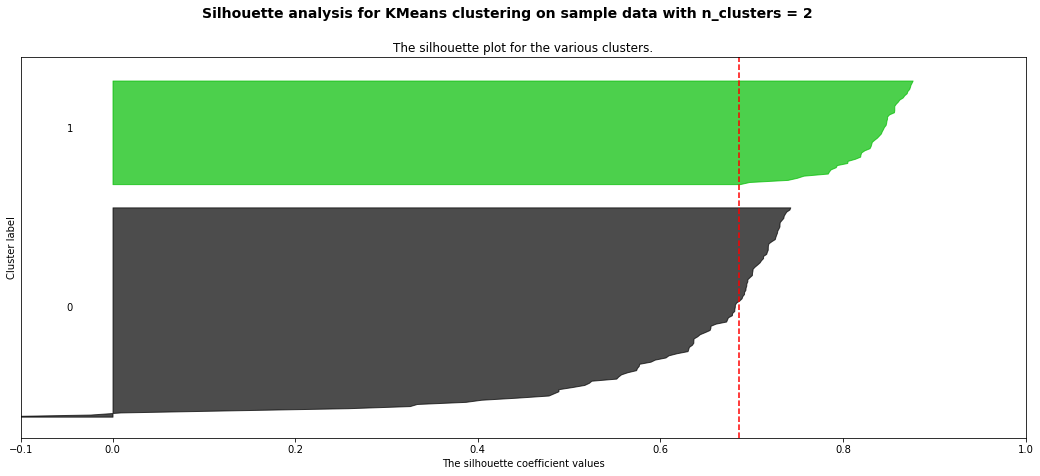

For n_clusters = 3 The average silhouette_score is : 0.505931216022


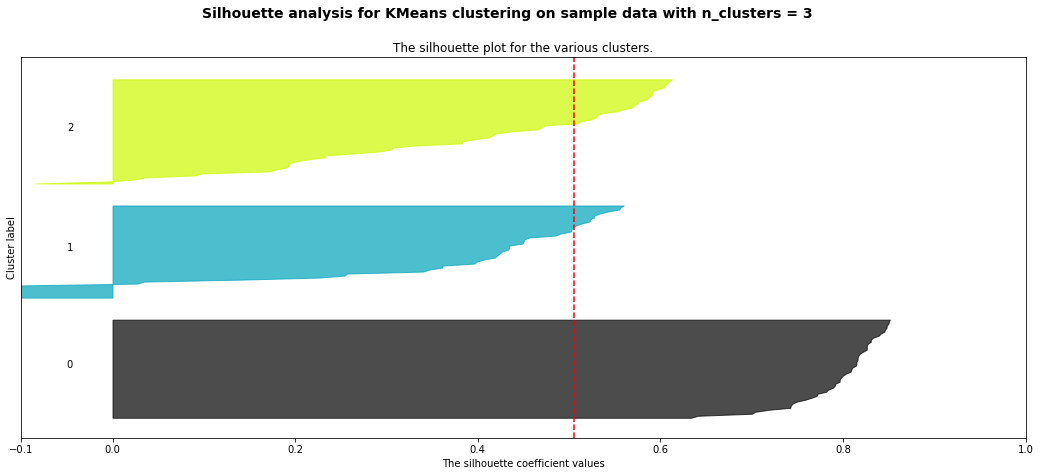

For n_clusters = 4 The average silhouette_score is : 0.356813785889


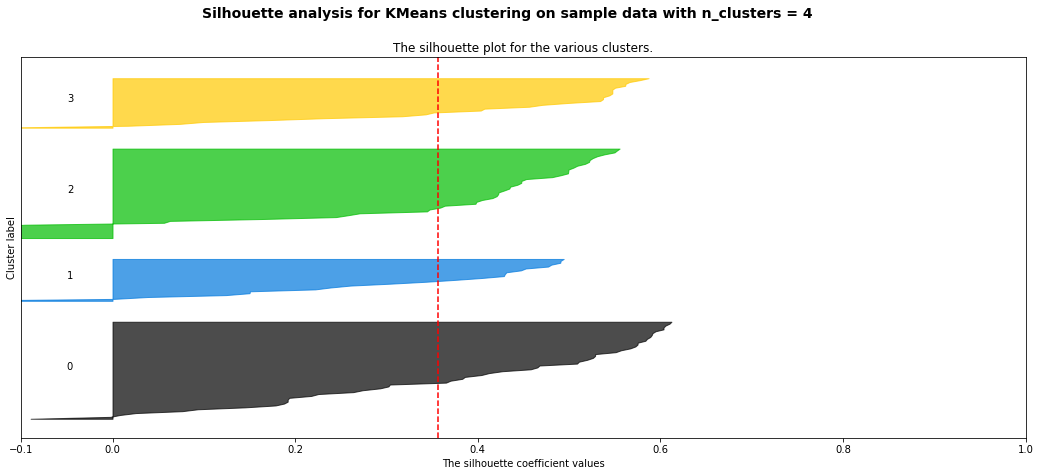

For n_clusters = 5 The average silhouette_score is : 0.321761250197


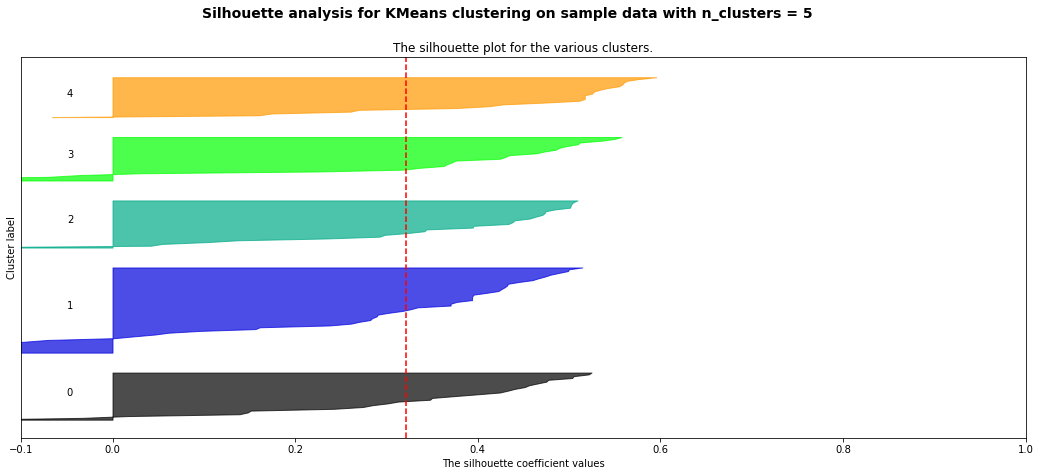

For n_clusters = 6 The average silhouette_score is : 0.286257029272


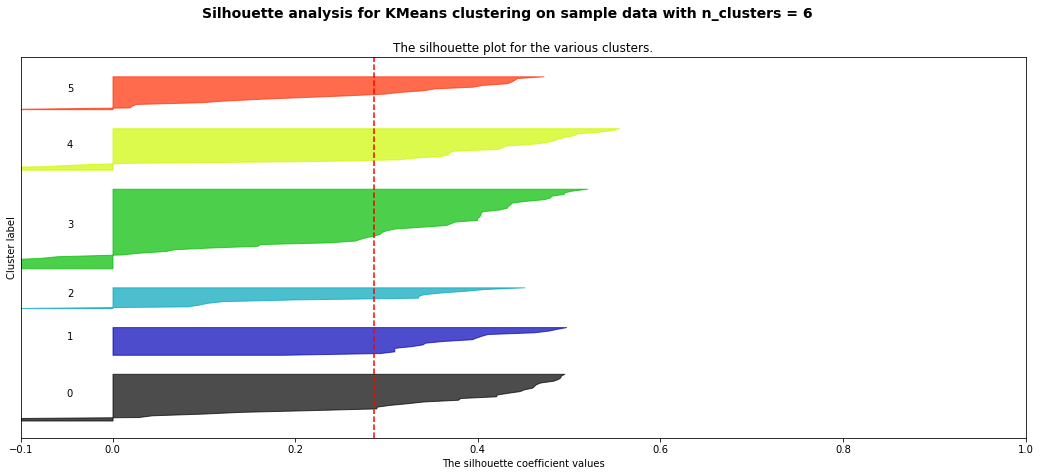

In [30]:
for i in range(2, 7):
    clusterer = Pipeline(steps=[
        ('scale', StandardScaler()),
        ('kmeans', KMeans(i))
    ])
    silhouette_plot(X, y, clusterer, i)

## Hierarchical Clustering

Use scipy for this one

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [32]:
linkage_method = 'ward'
distance_metric = 'euclidean'

In [33]:
clusters = linkage(X, linkage_method)

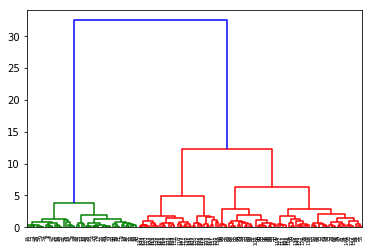

In [34]:
_ = dendrogram(clusters)

In [35]:
labels = fcluster(clusters, 7, depth=10)
pd.crosstab(y, labels)

col_0,1,2,3
row_0,,,
setosa,50,0,0
versicolor,0,1,49
virginica,0,35,15


## DBSCAN

For DBSCAN, we need to pick `min_samples` and $\epsilon$. One way to do this:

1. Fix a value of `min_samples` that makes sense.
2. Try a wide range of values for $\epsilon$ and record the number of unique labels for each one.
3. Look for a persistent number of clusters over a wide range of $\epsilon$

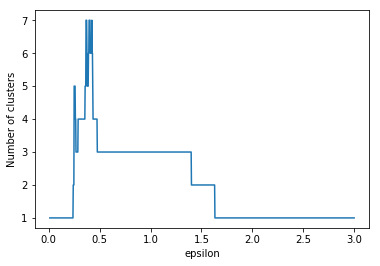

In [36]:
from sklearn.cluster import DBSCAN

epsilons = np.linspace(.01, 3, 1000)
def dbscan_clusters(eps):
    db = Pipeline([('scale', StandardScaler()), ('cluster', DBSCAN(eps=eps))])
    labels = db.fit_predict(X)
    return len(np.unique(labels))
nclusts = [dbscan_clusters(e) for e in epsilons]
plt.plot(epsilons, nclusts)
plt.xlabel('epsilon')
plt.ylabel('Number of clusters')
plt.show()

Pick a few representative choices for $\epsilon$ and see how the clusters compare to the true labels.

In [37]:
db = Pipeline([('scale', StandardScaler()), ('cluster', DBSCAN(eps=1))])
labels = db.fit_predict(X)
pd.crosstab(y, labels)

col_0,-1,0,1
row_0,,,
setosa,1,49,0
versicolor,0,0,50
virginica,2,0,48


In [38]:
db = Pipeline([('scale', StandardScaler()), ('cluster', DBSCAN(eps=1.5))])
labels = db.fit_predict(X)
pd.crosstab(y, labels)

col_0,0,1
row_0,,
setosa,50,0
versicolor,0,50
virginica,0,50


In [41]:
DBSCAN?